#                                       Car Price Prediction 

In [1]:
#importing all the useful modules to do the analysis on the dataset given
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
#getting the data from an url and reading it as a csv file into a python varaible data
url='https://raw.githubusercontent.com/Latentview/Hackathon/main/Used%20cars_price_prediction%20(2).csv'
data=pd.read_csv(url)
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
data.shape

(19237, 18)

The data contains 17237 rows and 18 columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Although the information of the data shows that there are no null values, if we observe the data, the Levy column has null values filled with "-". To remove those values, we are going to replace them with the mean value of Levy

In [9]:
data['Levy']=data['Levy'].replace("-",np.nan)
data['Levy']=data['Levy'].astype(float)
data['Levy']. fillna(value=data['Levy']. mean(), inplace=True)

In [10]:
data['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [11]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

As we can see the Mileage column is not an integer rather stored with a value appened with "km". Since everything is in kilometer, we can remove that from the column to utilize the column will with the integer values. Similarly, the Engine volumne column has the Engine type given along with the volume. To remove this inconsistency, we can create a separate column called Engine_turbo where we can store if the Engine is turbo or not by giving a value of 1 or 0

In [12]:
data['Mileage']=data['Mileage'].apply(lambda x:x.split(' ')[0])
data['Mileage']=data['Mileage'].astype('int')
data['Engine_turbo']=data['Engine volume'].apply(lambda x:1 if 'Turbo' in str(x) else 0)
data['Engine volume']=data['Engine volume'].apply(lambda x: x.split()[0])
data['Engine volume']=data['Engine volume'].astype(float)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int32  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Now, we partially cleaned the data by cleaning Levy, Mileage, Engine volume columns. Let us now move to the other columns and clean them

In [13]:
#Our data has both categorical as well as integer variables. Let us separate categorial variables into a data frame called cati_data
cati_data=data.select_dtypes(include=['object'])

In [14]:
cati_data.columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [15]:
#Let us see if our data has any null values again
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Engine_turbo        0
dtype: int64

Let us now analyze the categorical variables and clean them in our data

In [16]:
data['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

The doors has three different values which seems ambiguous, so let us consider 4-May as 4, 2-Mar as 2 and >5 as 5 in our data

In [17]:
data['Doors']=data['Doors'].map({'04-May':4, '02-Mar':2, '>5':5})

In [18]:
data['Doors']=data['Doors'].astype('float')

In [189]:
data['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

Let us now see the information of our categorical data. Everyting is an object as expected.

In [123]:
cati_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manufacturer      19237 non-null  object
 1   Model             19237 non-null  object
 2   Category          19237 non-null  object
 3   Leather interior  19237 non-null  object
 4   Fuel type         19237 non-null  object
 5   Gear box type     19237 non-null  object
 6   Drive wheels      19237 non-null  object
 7   Wheel             19237 non-null  object
 8   Color             19237 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [19]:
#Let us store all the catigorical variables names into a python variable called cols
cols=list(cati_data.columns)

In [20]:
(data[cols[0]].unique()) #printing unique manufacturers 

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

Now, Let us move on to the numerical data. Let us selelct all the numerical data and save into into num_data

In [21]:
num_data=data.select_dtypes(include=['float64', 'int'])
num_data

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Engine_turbo
0,45654403,13328,1399.000000,2010,3.5,186005,6.0,4.0,12,0
1,44731507,16621,1018.000000,2011,3.0,192000,6.0,4.0,8,0
2,45774419,8467,906.838128,2006,1.3,200000,4.0,4.0,2,0
3,45769185,3607,862.000000,2011,2.5,168966,4.0,4.0,0,0
4,45809263,11726,446.000000,2014,1.3,91901,4.0,4.0,4,0
...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.838128,1999,2.0,300000,4.0,2.0,5,1
19233,45778856,15681,831.000000,2011,2.4,161600,4.0,4.0,8,0
19234,45804997,26108,836.000000,2010,2.0,116365,4.0,4.0,4,0
19235,45793526,5331,1288.000000,2007,2.0,51258,4.0,4.0,4,0


The car ID do not contribute to any of our predictions. So let us drop it from our num_data. Whereas it remains still in our original data

In [22]:
num_data.drop('ID', axis=1, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
num_data

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Engine_turbo
0,13328,1399.000000,2010,3.5,186005,6.0,4.0,12,0
1,16621,1018.000000,2011,3.0,192000,6.0,4.0,8,0
2,8467,906.838128,2006,1.3,200000,4.0,4.0,2,0
3,3607,862.000000,2011,2.5,168966,4.0,4.0,0,0
4,11726,446.000000,2014,1.3,91901,4.0,4.0,4,0
...,...,...,...,...,...,...,...,...,...
19232,8467,906.838128,1999,2.0,300000,4.0,2.0,5,1
19233,15681,831.000000,2011,2.4,161600,4.0,4.0,8,0
19234,26108,836.000000,2010,2.0,116365,4.0,4.0,4,0
19235,5331,1288.000000,2007,2.0,51258,4.0,4.0,4,0


In [24]:
num_data['Price'].value_counts()

15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: Price, Length: 2315, dtype: int64

# Visualize to check the presence of outliers and if needed clean the dataset.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Levy'>

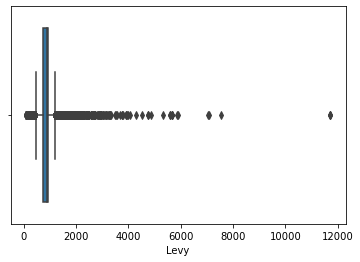

In [25]:
cols=['Levy','Engine volume','Mileage','Cylinders']
sb.boxplot(num_data[cols[0]])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine volume'>

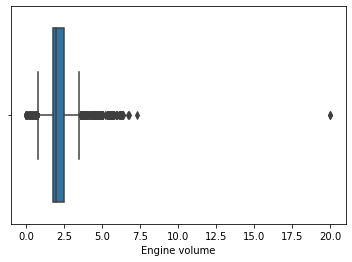

In [26]:
sb.boxplot(num_data[cols[1]])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

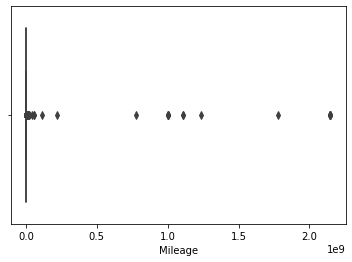

In [27]:
sb.boxplot(num_data[cols[2]])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders'>

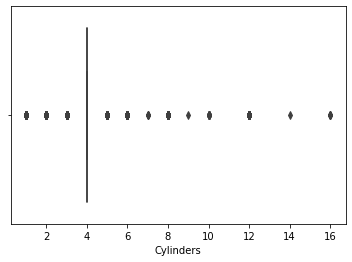

In [28]:
sb.boxplot(num_data[cols[3]])

Inference: There are outliers present in the data, however the outliers shown in cylinders can not be considered as outliers as th number of cylinders vary based on the car model

# Removing the outliers from the data

There are two good methods to remove the outliers:
    1. Z-Score/Standard Deviation
    2. IQR method (Interquartile Range)
I am choosing to go with IQR method, as we don't know whether to use 2sd, 3sd, etc..for good detection of outliers

In [29]:
cols=['Levy','Engine volume','Mileage']
for value in cols:
    q1=data[value].quantile(0.25)
    q3=data[value].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    num_data[value]= np.where(num_data[value]>upper_limit,upper_limit,np.where(num_data[value]<lower_limit,lower_limit,data[value]))
    

C:\Users\ALEKHY~1\AppData\Local\Temp/ipykernel_20516/269320179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[value]= np.where(num_data[value]>upper_limit,upper_limit,np.where(num_data[value]<lower_limit,lower_limit,data[value]))


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Levy'>

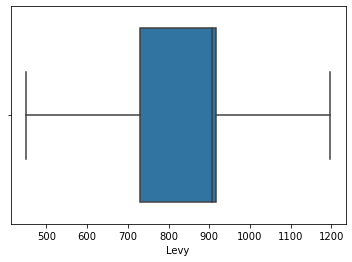

In [30]:
sb.boxplot(num_data[cols[0]])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine volume'>

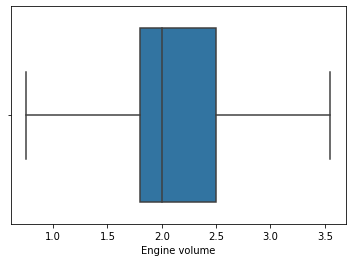

In [31]:
sb.boxplot(num_data[cols[1]])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

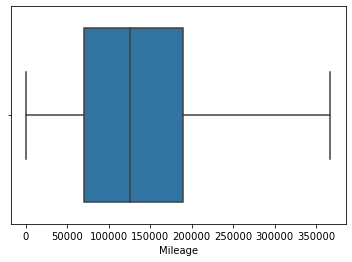

In [32]:
sb.boxplot(num_data[cols[2]])

The outlieres are visualized and removed from the data

# Overall correlation of numerical data present to the price of the car

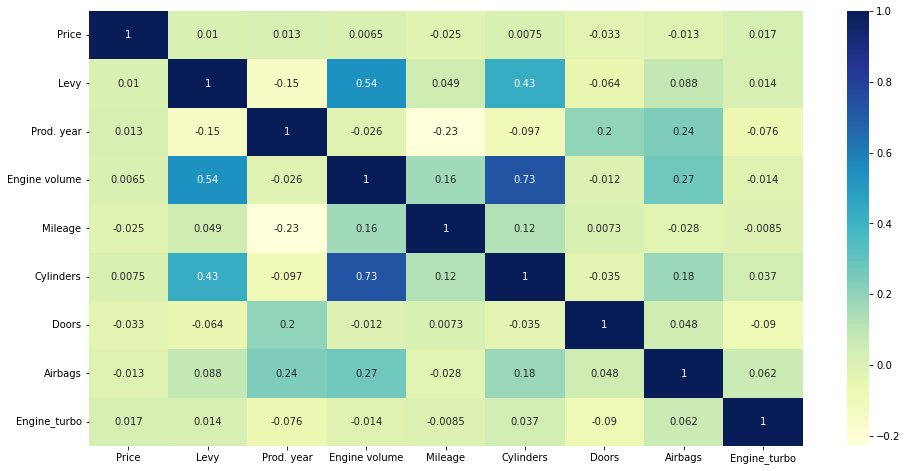

In [33]:
cor = num_data.corr()
plt.figure(figsize=(16,8))
sb.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Find out how the mileage of a car affects the price. 

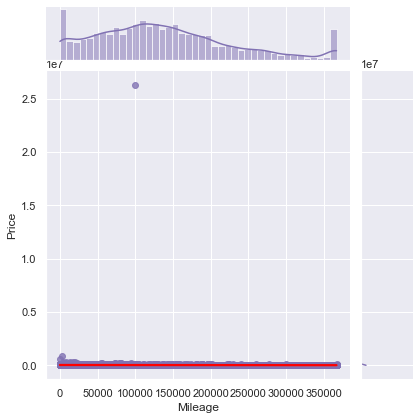

In [34]:
sb.set_theme(style="darkgrid") 
sb.jointplot(x="Mileage", y="Price", data=num_data, kind="reg", color="m", line_kws={'color': 'red'}) 
plt.show()

It seems like our Price columns as outliers, let us check

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

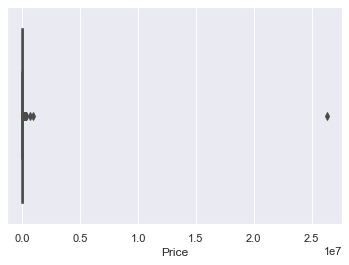

In [35]:
sb.boxplot(num_data['Price'])

## Price also has outliers that is the reason why we can not see any significant realtionships among the features. Let us try to remove outliers from the Price column

In [36]:
cols=['Price']
for value in cols:
    q1=data[value].quantile(0.25)
    q3=data[value].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    num_data[value]= np.where(num_data[value]>upper_limit,upper_limit,np.where(num_data[value]<lower_limit,lower_limit,data[value]))
    

C:\Users\ALEKHY~1\AppData\Local\Temp/ipykernel_20516/522826966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[value]= np.where(num_data[value]>upper_limit,upper_limit,np.where(num_data[value]<lower_limit,lower_limit,data[value]))


In [37]:
data['Price']= np.where(data['Price']>upper_limit,upper_limit,np.where(data['Price']<lower_limit,lower_limit,data['Price']))

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

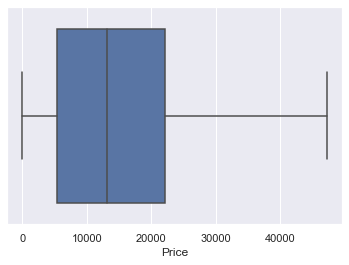

In [38]:
sb.boxplot(num_data[cols[0]])

### Now the outliers are removed from the price column

Text(0, 0.5, 'Car Price')

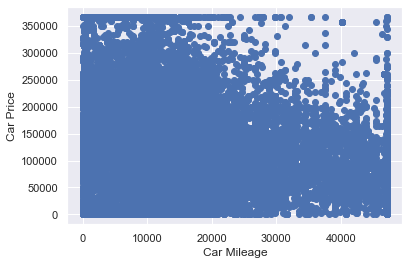

In [40]:
plt.scatter(num_data['Price'], num_data['Mileage'])
plt.xlabel("Car Mileage")
plt.ylabel("Car Price")

From the above plot we can infer that few cars with low mileage also has high price. And cars with high mileage has no high price. It mean the cars with high mileage comes under economic cars that are meant for the middle class familes to afford a car, who cares for mileage rather than speed, color, etc.

Now both the numerical data and categorical data are clean, let us now concatinate them and create a new data frame for further analysis

In [43]:
df=pd.concat([num_data, cati_data], axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              19237 non-null  float64
 2   Prod. year        19237 non-null  int64  
 3   Engine volume     19237 non-null  float64
 4   Mileage           19237 non-null  float64
 5   Cylinders         19237 non-null  float64
 6   Doors             19237 non-null  float64
 7   Airbags           19237 non-null  int64  
 8   Engine_turbo      19237 non-null  int64  
 9   Manufacturer      19237 non-null  object 
 10  Model             19237 non-null  object 
 11  Category          19237 non-null  object 
 12  Leather interior  19237 non-null  object 
 13  Fuel type         19237 non-null  object 
 14  Gear box type     19237 non-null  object 
 15  Drive wheels      19237 non-null  object 
 16  Doors             19237 non-null  object

# Does engine volume affect a price?

In [45]:
df['Engine volume'].unique()

array([3.5 , 3.  , 1.3 , 2.5 , 2.  , 1.8 , 2.4 , 3.55, 1.6 , 3.3 , 2.2 ,
       1.5 , 1.4 , 2.3 , 2.8 , 3.2 , 1.2 , 1.7 , 2.9 , 0.75, 1.9 , 2.7 ,
       1.1 , 2.1 , 1.  , 2.6 , 0.8 , 3.4 , 3.1 , 0.9 ])

<AxesSubplot:title={'center':'Price'}, xlabel='Engine volume'>

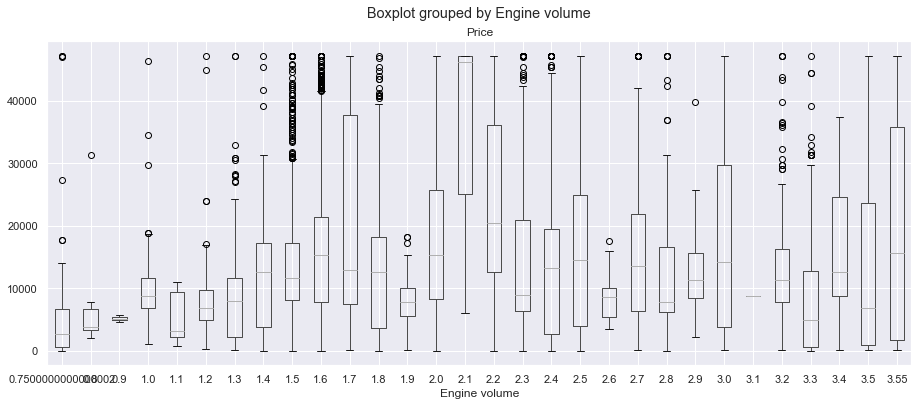

In [46]:
df.boxplot(column='Price', by='Engine volume', figsize=(15,6))

# What impact does engine volume have on the mileage of the car?

<AxesSubplot:title={'center':'Mileage'}, xlabel='Engine volume'>

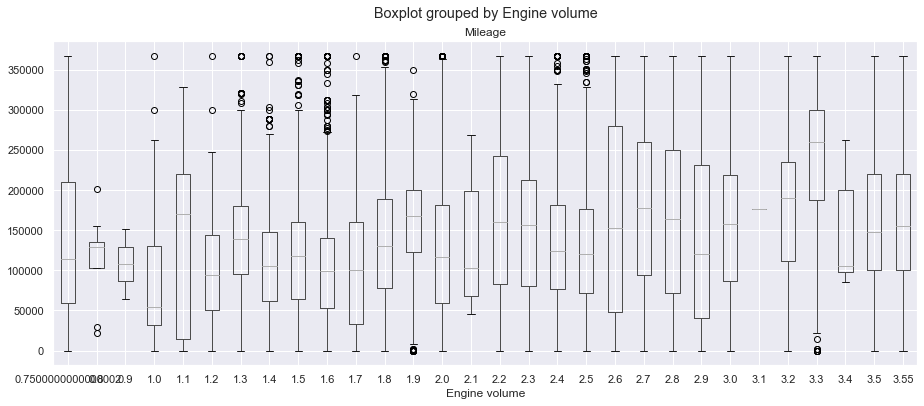

In [47]:
df.boxplot(column='Mileage', by='Engine volume', figsize=(15,6))

# How model and mileage of a car correlate with each other.

Let us see the data of model to understand what type of plot to use to show the relation between the model and the mileage

In [53]:
df['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [54]:
len(df.Model.unique())

1590

The number of categories of Model column is too many, so we can not go for a box plot. I tried dython.nominal.associations but it did not work. So let us go ahead and try taking average mileage for each model and plot it

In [87]:
models=list(df.Model.unique())
avg_mileage=list(df.groupby('Model')['Mileage'].mean())

In [88]:
len(avg_mileage)

1590

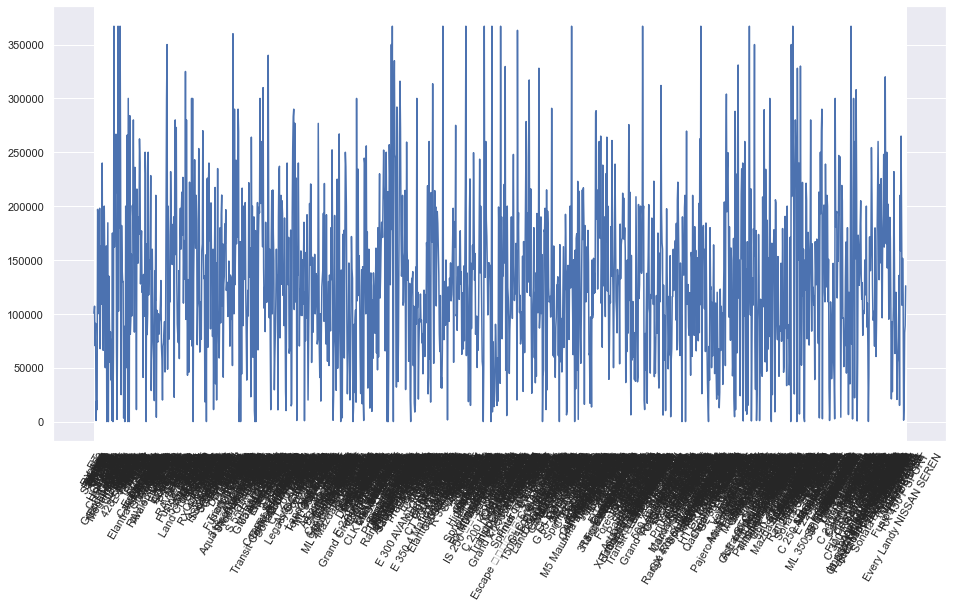

In [91]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.tick_params('x', rotation=60)
plt.plot(models, avg_mileage)
plt.show()

Since the number of models are more than 1500, the x-axis is messy but if we focus on the plot, few models got high mileage where as few got less mileage

# Check production year is the main factor towards the price of a car.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


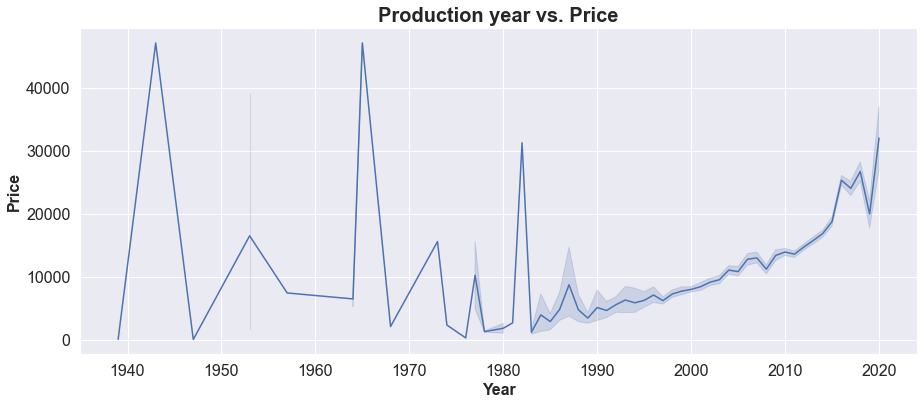

In [94]:


fig, ax = plt.subplots(figsize=(15, 6))

sb.lineplot(df['Prod. year'], df['Price'] )

ax.set_title('Production year vs. Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

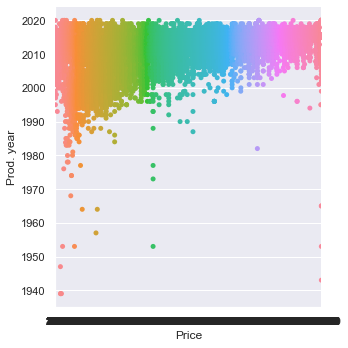

In [197]:
tips = data.copy()
sb.catplot(data=tips, x="Price", y="Prod. year")

# Check whether fuel types highly effect on price hike of a car.

<AxesSubplot:title={'center':'Price'}, xlabel='Fuel type'>

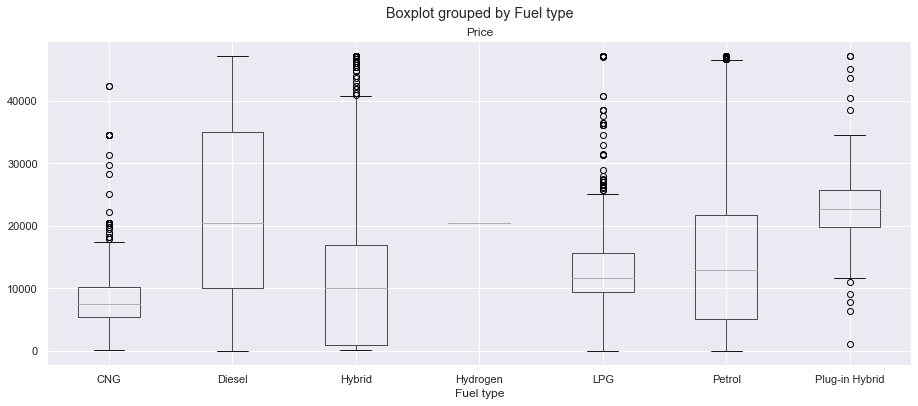

In [96]:
df.boxplot(column='Price', by='Fuel type', figsize=(15,6))

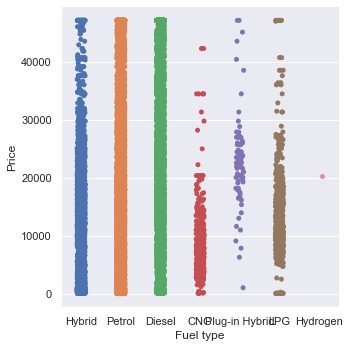

In [174]:
tips = data.copy()
sb.catplot(data=tips, x="Fuel type", y="Price")

# Check whether the color of a car impact on price or not.

<AxesSubplot:title={'center':'Price'}, xlabel='Color'>

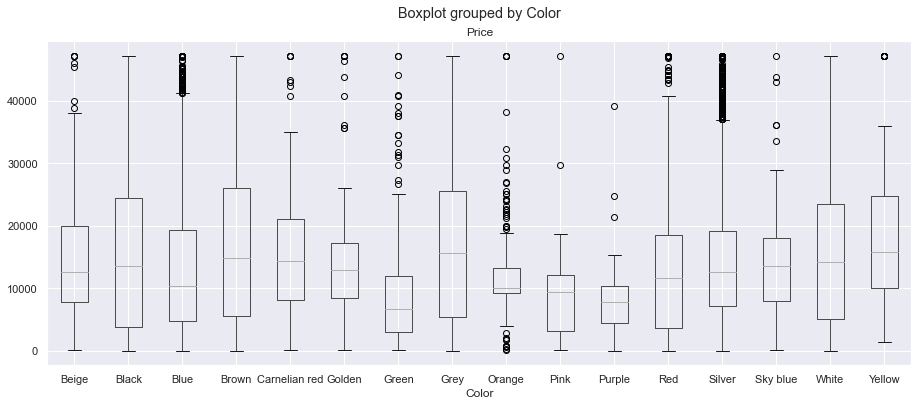

In [97]:
df.boxplot(column='Price', by='Color', figsize=(15,6))

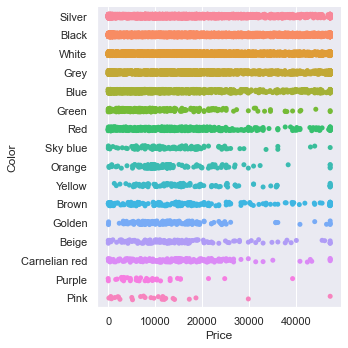

In [176]:
tips = data.copy()
sb.catplot(data=tips, x="Price", y="Color")

Now, we shall sclae the values in num data, and apply ordinal encoding to catigorical data and concat them

In [99]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder
mms=MinMaxScaler()
num_dataframe=pd.DataFrame(mms.fit_transform(num_data),
                          columns=list(num_data.columns))

In [100]:
num_dataframe.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Engine_turbo
0,0.282412,1.000000,0.876543,0.982143,0.506810,0.333333,0.666667,0.750,0.0
1,0.352193,0.760027,0.888889,0.803571,0.523144,0.333333,0.666667,0.500,0.0
2,0.179402,0.611415,0.827160,0.196429,0.544942,0.200000,0.666667,0.125,0.0
3,0.076414,0.551471,0.888889,0.625000,0.460383,0.200000,0.666667,0.000,0.0
4,0.248464,0.000000,0.925926,0.196429,0.250404,0.200000,0.666667,0.250,0.0


In [101]:
cati_data=data.select_dtypes(include=['object'])

In [102]:
oe=OrdinalEncoder()
cat_dataframe=pd.DataFrame(oe.fit_transform(cati_data),
                          columns=list(cati_data.columns))

In [103]:
cat_dataframe.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32.0,1242.0,4.0,1.0,2.0,0.0,0.0,0.0,12.0
1,8.0,658.0,4.0,0.0,5.0,2.0,0.0,0.0,1.0
2,21.0,684.0,3.0,0.0,5.0,3.0,1.0,1.0,1.0
3,16.0,661.0,4.0,1.0,2.0,0.0,0.0,0.0,14.0
4,21.0,684.0,3.0,1.0,5.0,0.0,1.0,0.0,12.0


Now, let us create a new dataframe called concat and concat both numerical and non-numerical data into it.

In [104]:
concat=pd.concat([num_dataframe,cat_dataframe],axis=1)

In [105]:
concat.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Engine_turbo,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,0.282412,1.000000,0.876543,0.982143,0.506810,0.333333,0.666667,0.750,0.0,32.0,1242.0,4.0,1.0,2.0,0.0,0.0,0.0,12.0
1,0.352193,0.760027,0.888889,0.803571,0.523144,0.333333,0.666667,0.500,0.0,8.0,658.0,4.0,0.0,5.0,2.0,0.0,0.0,1.0
2,0.179402,0.611415,0.827160,0.196429,0.544942,0.200000,0.666667,0.125,0.0,21.0,684.0,3.0,0.0,5.0,3.0,1.0,1.0,1.0
3,0.076414,0.551471,0.888889,0.625000,0.460383,0.200000,0.666667,0.000,0.0,16.0,661.0,4.0,1.0,2.0,0.0,0.0,0.0,14.0
4,0.248464,0.000000,0.925926,0.196429,0.250404,0.200000,0.666667,0.250,0.0,21.0,684.0,3.0,1.0,5.0,0.0,1.0,0.0,12.0


# We are ready to build a model

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import SequentialFeatureSelector,RFE
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [107]:
df_target=df['Price']

## Let us construct three models and check which model is giving less root mean square error, mean absolute error and find the best model among the three

# Model 1: OLS model (Ordinary Least Square model) 

The ordinary least squares (OLS) method is a linear regression technique that assumes that the analyst is fitting a model of a relationship between one or more explanatory variables and a continuous or at least interval outcome variable that minimizes the sum of square errors 

In [ ]:
x=concat.copy()
y=df_target.copy()
x_constant=sm.add_constant(x)
x_train,x_test,y_train,y_test=train_test_split(x_constant,y,test_size=0.25,random_state=5)
mlr_model=sm.OLS(np.log(y_train),x_train).fit()
mlr_model.summary()

In [119]:
y_train_prediction=mlr_model.predict(x_train)
y_test_prediction=mlr_model.predict(x_test)
rmse_train=np.sqrt(mean_squared_error(np.log(y_train),y_train_prediction))
rmse_test=np.sqrt(mean_squared_error(np.log(y_test),y_test_prediction))
print("The root mean square error of train data is  {}, test data is {}".format(rmse_train, rmse_test))

The root mean square error of train data is  0.9211824552134552, test data is 0.9203074453723644


In [120]:
mae_train=np.sqrt(mean_absolute_error(np.log(y_train),y_train_prediction))
mae_test=np.sqrt(mean_absolute_error(np.log(y_test),y_test_prediction))
print("The root mean absolute error of train data is  {}, test data is {}".format(mae_train, mae_test))

The root mean absolute error of train data is  0.8178172778026533, test data is 0.8172207873440397


# Model 2: RandomForestRegressor model 

# Model 3: LinearRegression model

In [109]:
rfr=RandomForestRegressor()
linreg=LinearRegression()

In [110]:
def rmse(model):
    model.fit(x_train,np.log(y_train))
    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)
    rmse_train=np.sqrt(mean_squared_error(np.log(y_train),y_train_prediction))
    rmse_test=np.sqrt(mean_squared_error(np.log(y_test),y_test_prediction))
    return rmse_train,rmse_test

In [111]:
def mae(model):
    model.fit(x_train,np.log(y_train))
    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)
    mae_train=mean_absolute_error(np.log(y_train),y_train_prediction)
    mae_test=mean_absolute_error(np.log(y_test),y_test_prediction)
    return mae_train,mae_test

In [112]:
def rfe(model):
    rfe_model=RFE(estimator=model,n_features_to_select=12)
    rfe_model.fit(x_train,np.log(y_train))
    rfe_ranking=pd.Series(rfe_model.ranking_,index=x_train.columns)
    x=rfe_ranking[rfe_ranking==1].index
    return x

In [159]:
print(rmse(linreg))
print(mae(linreg))
print(rfe(linreg))

(1.4864390671490675, 1.5004037476413463)
(1.1066481111326085, 1.120285682527156)
Index(['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels',
       'Doors', 'Wheel', 'Engine_turbo'],
      dtype='object')


In [115]:
print(rmse(rfr))
print(mae(rfr))
print(rfe(rfr))

(0.004056822951891745, 0.008572072786837656)
(0.00015188950111228645, 0.00033128740661911234)
Index(['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Manufacturer', 'Model', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Color'],
      dtype='object')


## Model 1: 
The root mean square error of train data is  0.9211824552134552, test data is 0.9203074453723644
The root mean absolute error of train data is  0.8178172778026533, test data is 0.8172207873440397
## Model 2:
The root mean square error of train data is  0.004056822951891745, test data is 0.008572072786837656
The root mean absolute error of train data is 0.00015188950111228645, test data is 0.00033128740661911234
## Model 3:
The root mean square error of train data is  1.4864390671490675, test data is 1.5004037476413463
The root mean absolute error of train data is 1.1066481111326085, test data is 1.120285682527156

# Therefore, Model 2 (RandomForestRegression Model) gave us best results with minimum RMSE and MAE values.